In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("datasets_222487_478477_framingham.csv")

In [151]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [153]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [154]:
# Since the average and median values are close in most variables, I filled the nan values according to the median.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer.fit(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputer.transform(df.iloc[:,:-1].values)

In [155]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [156]:
#Outlier Detection (Kuantil)
for column in df.columns[1:-1]:
    for chd in df.TenYearCHD.unique():
        selectedCHD= df[df["TenYearCHD"] == chd]
        selected_column= selectedCHD[column]

        q1=selected_column.quantile(0.25)
        q3=selected_column.quantile(0.75)

        iqr = q3-q1
        minimum = q1-1.5*iqr
        maximum = q3+1.5*iqr

        print(column,chd, "| min= ",minimum, "|max= ",maximum)

        max_idxs = df[(df["TenYearCHD"]== chd) &  (df[column] > maximum)].index
        print(max_idxs)
        min_idxs = df[(df["TenYearCHD"]== chd) &  (df[column] < minimum)].index
        print(min_idxs)
        df.drop(index = max_idxs, inplace = True)
        df.drop(index= min_idxs, inplace = True)

age 0 | min=  22.5 |max=  74.5
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
age 1 | min=  28.5 |max=  80.5
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
education 0 | min=  -2.0 |max=  6.0
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
education 1 | min=  -0.5 |max=  3.5
Int64Index([  25,   59,   94,  139,  145,  148,  343,  371,  448,  522,  566,
             573,  592,  738,  765,  771,  882,  889, 1032, 1058, 1093, 1098,
            1257, 1391, 1601, 1729, 1779, 1952, 1974, 2079, 2088, 2271, 2325,
            2328, 2335, 2343, 2367, 2383, 2469, 2517, 2716, 2796, 2958, 3001,
            3181, 3190, 3254, 3320, 3327, 3357, 3369, 3446, 3528, 3537, 3564,
            3627, 3779, 3783, 3790, 3804, 3853, 3874, 3884, 3954, 3957, 4075,
            4155, 4163, 4207, 4223],
           dtype='int64')
Int64Index([], dtype='int64')
currentSmoker 0 | min=  -1.5 |max=  2.5
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
currentSmoker 1 | min=  -

In [157]:
df.drop(columns="BPMeds",inplace=True)
df.drop(columns="prevalentStroke",inplace=True)
df.drop(columns="diabetes",inplace= True)

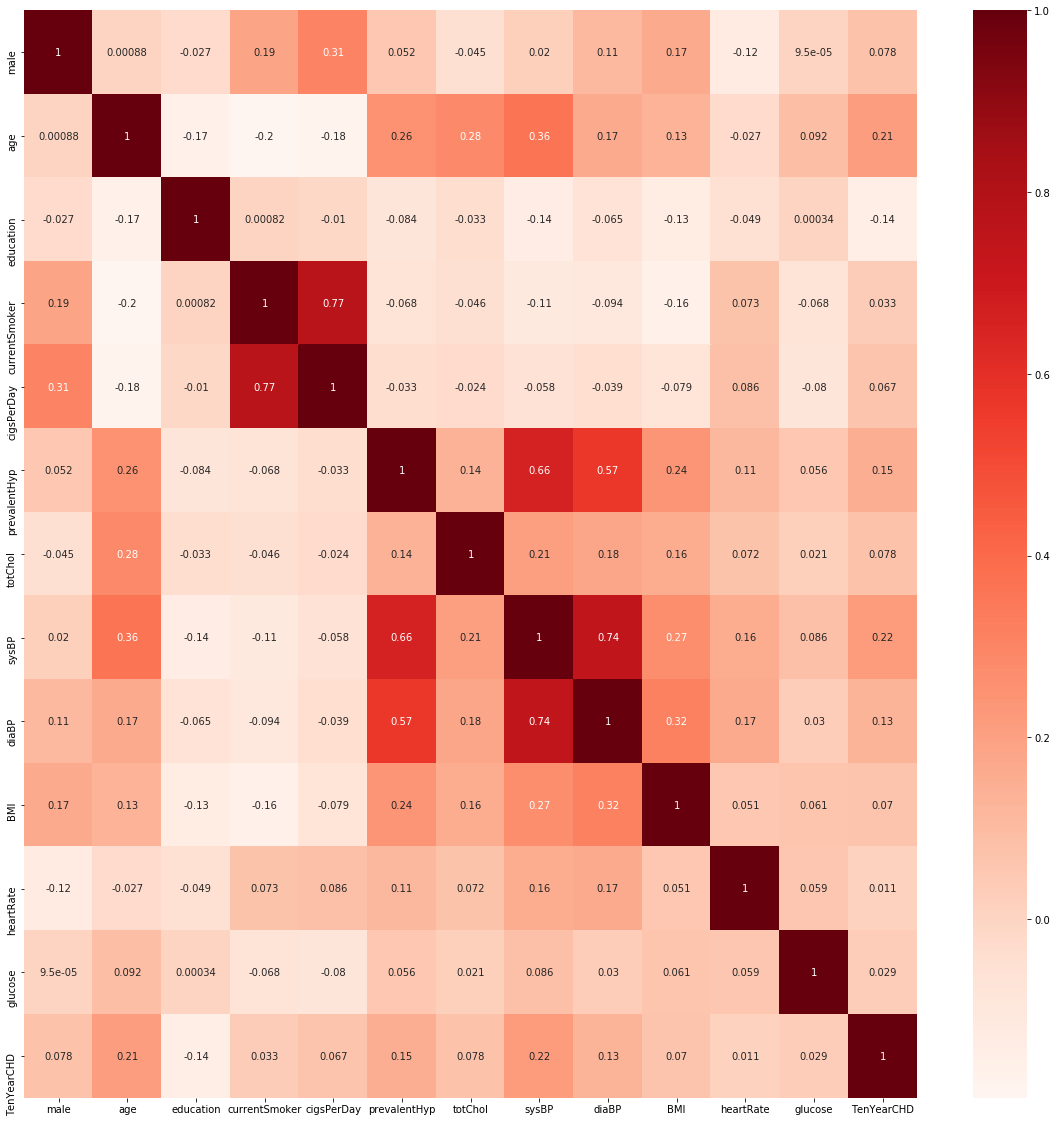

In [158]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns_heat=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
fig=sns_heat.get_figure
plt.show()

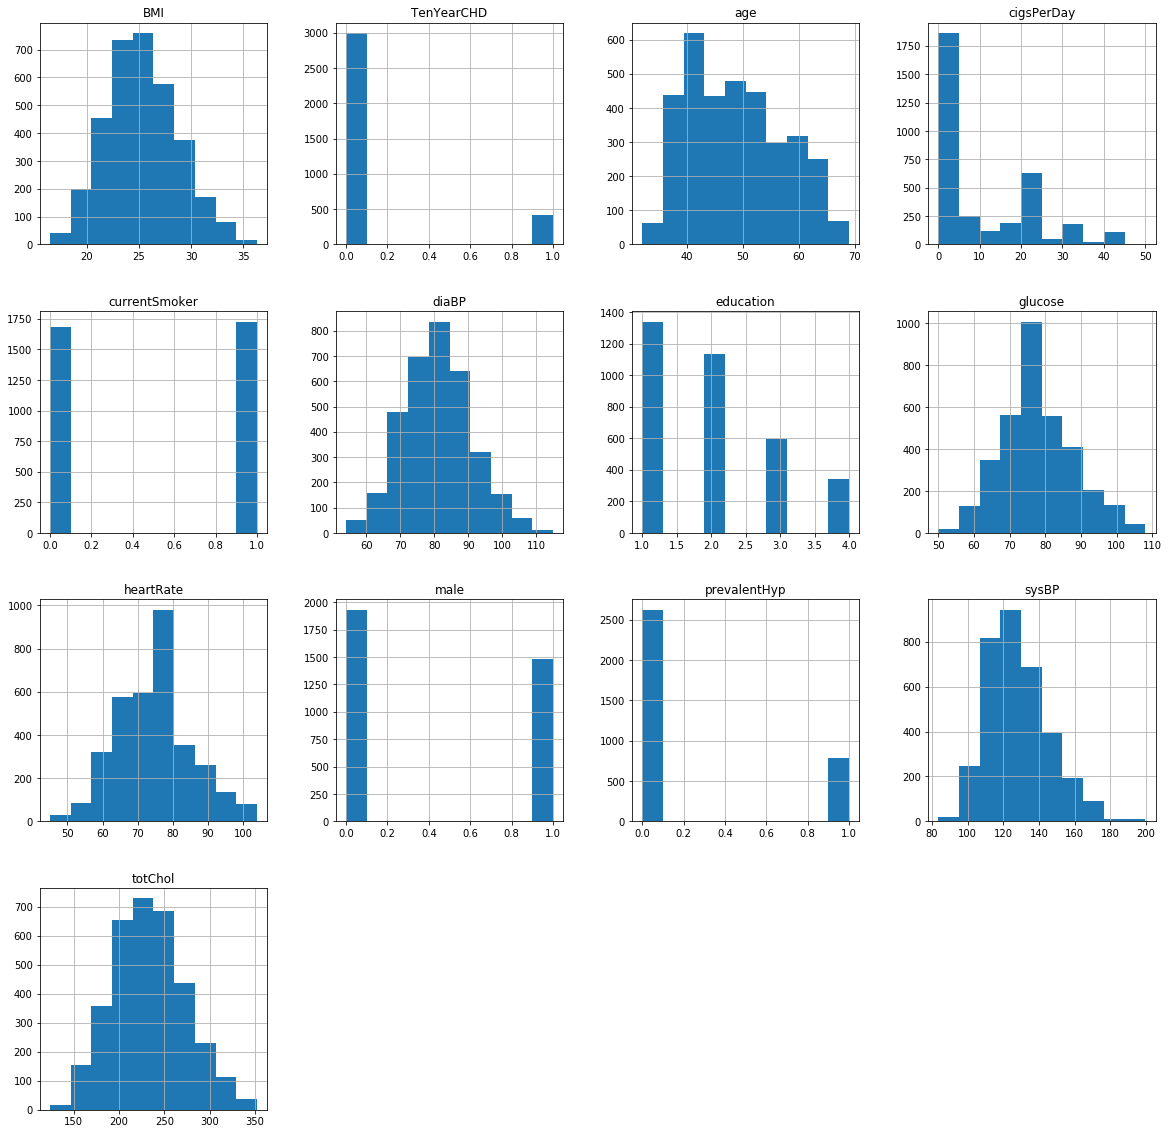

In [159]:
df.hist(figsize=(20, 20))
plt.show()

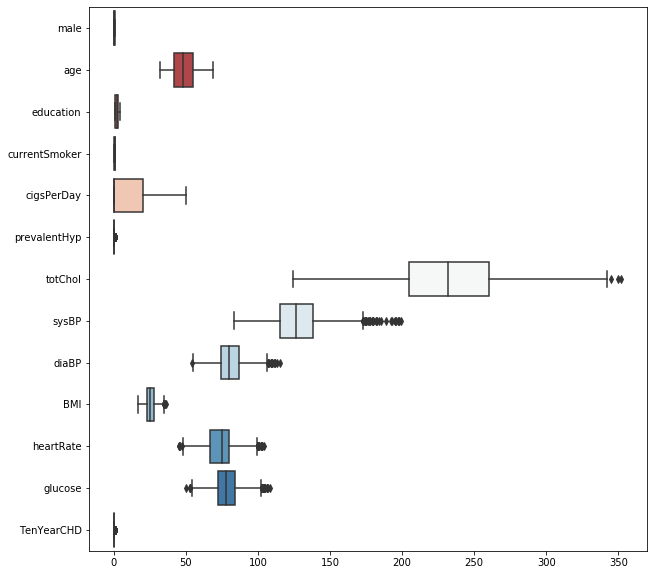

In [160]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,palette='RdBu',orient='h')

In [161]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [162]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [163]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
X_train = stdc.fit_transform(X_train)
X_test = stdc.transform(X_test)

In [164]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

preds = lr.predict(X_test)
print(classification_report(y_test, preds))

precision    recall  f1-score   support

           0       0.88      0.99      0.94       600
           1       0.62      0.06      0.11        83

    accuracy                           0.88       683
   macro avg       0.75      0.53      0.52       683
weighted avg       0.85      0.88      0.84       683



AUC: 0.74


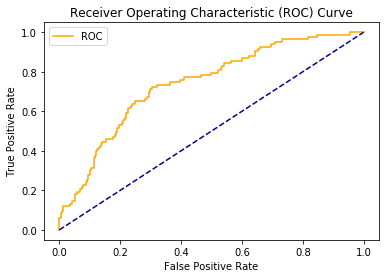

In [165]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [166]:
cross_val_score(lr,X_test,y_test,cv=10).mean()

0.8785166240409208

In [167]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
result = knn.predict(X_test)
print(classification_report(y_test, result))


precision    recall  f1-score   support

           0       0.88      0.98      0.93       600
           1       0.31      0.06      0.10        83

    accuracy                           0.87       683
   macro avg       0.60      0.52      0.52       683
weighted avg       0.81      0.87      0.83       683



AUC: 0.65


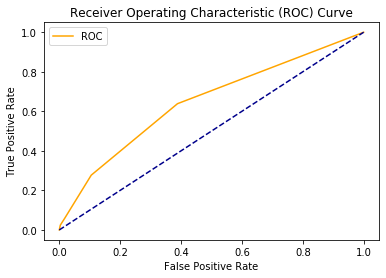

In [168]:
#ROC
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [169]:
#Knn model tuning
knn_params ={"n_neighbors": np.arange(1,10), "metric": ["euclidean","minkowski","manhattan"]}
knn_cv_model = GridSearchCV(knn,knn_params, cv=10,n_jobs=-1, verbose=2).fit(X_train,y_train)
knn_cv_model.score(X_test,y_test)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    8.8s finished


0.8740849194729137

In [170]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [171]:
knn_tuned = KNeighborsClassifier(metric='euclidean',n_neighbors=9).fit(X_train,y_train)

result = knn_tuned.predict(X_test)

print(classification_report(y_test, result))


precision    recall  f1-score   support

           0       0.88      0.99      0.93       600
           1       0.33      0.04      0.07        83

    accuracy                           0.87       683
   macro avg       0.61      0.51      0.50       683
weighted avg       0.81      0.87      0.83       683



AUC: 0.67


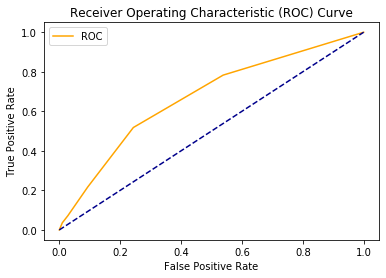

In [172]:
#ROC
probs = knn_tuned.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [173]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train,y_train)
result = svm_model.predict(X_test)
print(classification_report(y_test, result))

precision    recall  f1-score   support

           0       0.88      1.00      0.94       600
           1       0.80      0.05      0.09        83

    accuracy                           0.88       683
   macro avg       0.84      0.52      0.51       683
weighted avg       0.87      0.88      0.83       683



In [174]:
#svm model tuning
svm = SVC() 
svm_params ={"C": [0.1,1,2,3],"kernel": ["rbf","poly"],"degree" : [0, 1, 2,3,4]}
svm_cv_model = GridSearchCV(svm,svm_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   28.6s finished


In [175]:
svm_cv_model.best_score_

0.8831501831501832

In [176]:
svm_cv_model.best_params_

{'C': 3, 'degree': 0, 'kernel': 'rbf'}

In [177]:
#final model
svm_tuned = SVC(C=3, kernel= "rbf",degree=0).fit(X_train,y_train)
result = svm_tuned.predict(X_test)
print(classification_report(y_test, result))

precision    recall  f1-score   support

           0       0.88      0.99      0.94       600
           1       0.56      0.06      0.11        83

    accuracy                           0.88       683
   macro avg       0.72      0.53      0.52       683
weighted avg       0.84      0.88      0.84       683



In [178]:
from sklearn.neural_network import MLPClassifier

mlpc_model = MLPClassifier(activation="logistic").fit(X_train,y_train)
result = mlpc_model.predict(X_test)
accuracy_score(y_test,result)

0.8828696925329429

In [81]:
mlpc_params={"alpha": [0.1,0.01,0.03],"hidden_layer_sizes": [(10,10),(100,100,100),(3,5)],"solver": ["lbfgs","adam"]}

In [82]:
#mlpc tuning
mlpc=MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params ,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.4min finished


In [83]:
mlpc_cv_model.best_score_

0.8787545787545789

In [84]:
mlpc_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'adam'}

In [179]:
#mlpc tuned
mlpc_tuned = MLPClassifier(activation="logistic",alpha=0.1,hidden_layer_sizes=(10,10),solver="adam").fit(X_train,y_train)
result = mlpc_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8784773060029283

In [180]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [181]:
result = cart_model.predict(X_test)
accuracy_score(y_test,result)

0.808199121522694

In [88]:
cart = DecisionTreeClassifier()
cart_params={"max_depth": [1,3,5,7],"min_samples_split": [2,3,6,10,15,20]}

In [89]:
cart_cv_model = GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.7s finished


In [90]:
cart_cv_model.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [182]:
cart_tuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(X_train,y_train)

In [183]:
result = cart_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8828696925329429

In [184]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [185]:
result = rf_model.predict(X_test)
accuracy_score(y_test,result)

0.8872620790629575

In [42]:
#rf model tuning
rf = RandomForestClassifier()
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [1,3,5,7],
            "min_samples_split": [2,5,7]}
rf_cv_model = GridSearchCV(rf,rf_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.9min finished


In [43]:
rf_cv_model.best_params_

{'max_features': 1, 'min_samples_split': 5, 'n_estimators': 1000}

In [186]:
rf_tuned = RandomForestClassifier(max_features= 1,min_samples_split= 2,n_estimators=1000).fit(X_train,y_train)
result = rf_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8857979502196194

In [187]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [188]:
result = gbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8843338213762811

In [195]:
gbm = GradientBoostingClassifier()
gbm_params = {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [2,3,5,8]}

gbm_cv_model= GridSearchCV(gbm,gbm_params,cv=10, n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.0min finished


In [194]:
gbm_cv_model.best_params_

NameError: name 'gbm_cv_model' is not defined

In [190]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.001,max_depth=2,n_estimators=100).fit(X_train,y_train)
result = gbm_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8784773060029283

In [191]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective="binary:logistic").fit(X_train,y_train)

In [192]:
result = xgb_model.predict(X_test)
accuracy_score(y_test,result)

0.890190336749634

In [52]:
xgb = XGBClassifier()
xgb_params = {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000,2000],
              "max_depth": [2,3,5,8]}

In [53]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 21.9min finished


In [54]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [55]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,max_depth= 2,n_estimators= 100).fit(X_train,y_train)

In [56]:
result = xgb_tuned.predict(X_test)
accuracy_score(y_test,result)

0.8419811320754716

In [57]:
from lightgbm import LGBMClassifier

In [58]:
lgbm_model = LGBMClassifier().fit(X_train,y_train)
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [60]:
lgbm = LGBMClassifier()
lgbm_params= {"learning_rate": [0.1,0.001,0.05],
              "n_estimators": [100,500,1000],
              "max_depth": [2,3,5,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


In [61]:
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094

In [62]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [63]:
lgbm_tuned = LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=100).fit(X_train,y_train)
result = lgbm_model.predict(X_test)
accuracy_score(y_test,result)

0.8443396226415094